# CityGML LoDs Model Generation

In [53]:
import geopandas as gpd
gdf_porch = gpd.read_file("./shp/porticos_dbgt.shp").to_crs("EPSG:32632")
gdf_porch.head

<bound method NDFrame.head of       id  height  layer                                           geometry
0   None     5.0   -1.0  POLYGON ((641049.504 5002138.862, 641048.874 5...
1   None     4.3   -1.0  POLYGON ((640934.804 5002078.535, 640935.773 5...
2   None     4.3   -1.0  POLYGON ((640909.938 5002066.864, 640907.383 5...
3   None     5.0   -1.0  POLYGON ((641033.106 5002129.524, 641037.551 5...
4   None     5.0   -1.0  POLYGON ((641097.972 5002177.290, 641083.921 5...
5   None     4.3   -1.0  POLYGON ((640926.918 5002075.684, 640920.293 5...
6   None     5.0   -1.0  POLYGON ((641049.313 5002136.073, 641047.629 5...
7   None     5.0   -1.0  POLYGON ((641113.248 5002190.548, 641105.741 5...
8   None     5.0   -1.0  POLYGON ((641066.946 5002150.916, 641063.780 5...
9   None     4.3   -1.0  POLYGON ((640983.147 5002100.113, 640980.506 5...
10  None     4.3   -1.0  POLYGON ((640890.516 5002060.809, 640878.502 5...
11  None     4.3   -1.0  POLYGON ((640916.207 5002069.067, 640909.938 

## LoD0

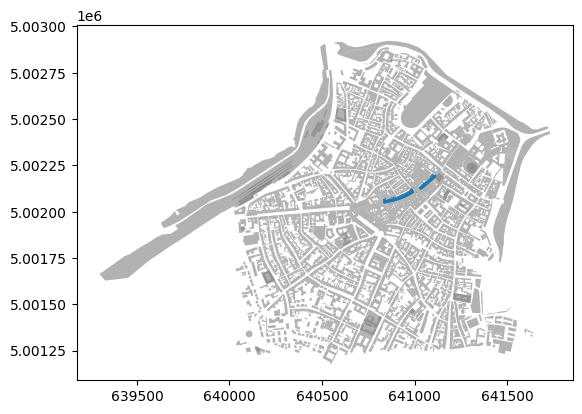

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely import total_bounds

# reading data
gdf_porch = gpd.read_file("./shp/porticos_dbgt.shp").to_crs("EPSG:32632")
gdf_bp_1 = gpd.read_file("./shp/dbgt_building_porch_1_lod1.shp").to_crs("EPSG:32632")
gdf_bp_2 = gpd.read_file("./shp/dggt_buidings_porch_2_lod1.shp").to_crs("EPSG:32632")
basemap = gpd.read_file("./shp/mantua_basemap_buildings.geojson").to_crs("EPSG:32632")
bounds = total_bounds(gdf_porch.geometry).tolist()

# plot main frame, higher zorder topper layer
fig, ax = plt.subplots()
basemap.plot(ax=ax, color='gray', alpha=0.6, zorder=1)
gdf_bp_1.plot(ax=ax, zorder=2)
gdf_bp_2.plot(ax=ax, zorder=2)
gdf_porch.boundary.plot(ax=ax, zorder=3)

plt.show()

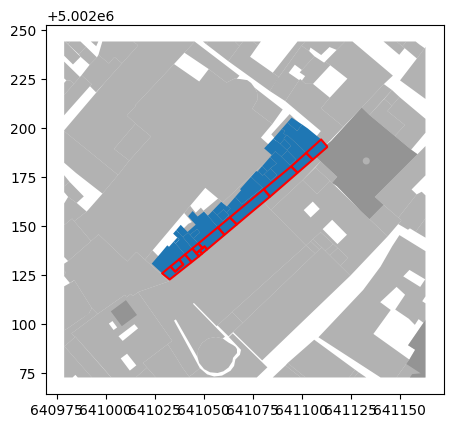

In [54]:
# zoom to porch builidngs by clipping data
gdf_porch_1 = gpd.read_file("./shp/porticos_dbgt.shp", where="height=5.0").to_crs("EPSG:32632")
gdf_bp_1 = gpd.read_file("./shp/dbgt_building_porch_1_lod1.shp").to_crs("EPSG:32632")
basemap = gpd.read_file("./shp/mantua_basemap_buildings.geojson").to_crs("EPSG:32632")
bounds = total_bounds(gdf_porch_1.geometry).tolist()
bounds[0]-=50
bounds[1]-=50
bounds[2]+=50
bounds[3]+=50
zoom_basemap=basemap.clip_by_rect(*bounds)

# plot main frame, higher zorder topper layer
fig, ax = plt.subplots()
zoom_basemap.plot(ax=ax, color='gray', alpha=0.6, zorder=1)
gdf_bp_1.plot(ax=ax, zorder=2)
gdf_porch_1.boundary.plot(ax=ax, color='red', zorder=3)

plt.show()

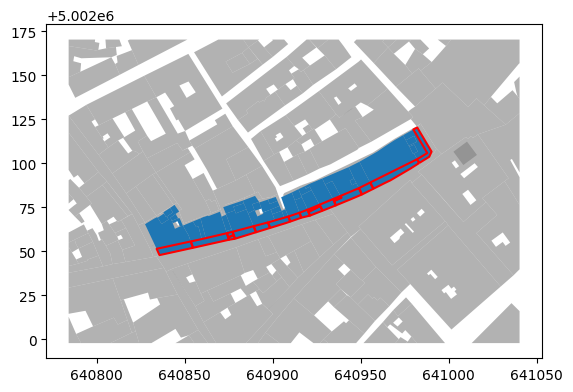

In [58]:
# zoom to porch builidngs by clipping data
gdf_porch_2 = gpd.read_file("./shp/porticos_dbgt.shp", where="height=4.3").to_crs("EPSG:32632")
gdf_bp_2 = gpd.read_file("./shp/dggt_buidings_porch_2_lod1.shp").to_crs("EPSG:32632")
basemap = gpd.read_file("./shp/mantua_basemap_buildings.geojson").to_crs("EPSG:32632")
bounds = total_bounds(gdf_porch_2.geometry).tolist()
bounds[0]-=50
bounds[1]-=50
bounds[2]+=50
bounds[3]+=50
zoom_basemap=basemap.clip_by_rect(*bounds)

# plot main frame, higher zorder topper layer
fig, ax = plt.subplots()
zoom_basemap.plot(ax=ax, color='gray', alpha=0.6, zorder=1)
gdf_bp_2.plot(ax=ax, zorder=2)
gdf_porch_2.boundary.plot(ax=ax, color='red', zorder=3)

plt.show()

## LoD1

### heights of porch, heights of buildings computation

In [10]:
# compute heights of porch box
import open3d as o3d
import pandas as pd
import numpy as np

In [5]:
print("Load a point cloud")
pcd_df= pd.read_csv("porch_pts/porch_2.xyz", delimiter=",")
print(pcd_df.columns)

Load a point cloud
Index(['//X', 'Y', 'Z', 'R', 'G', 'B', 'Scalar field'], dtype='object')


In [6]:
pcd_df['Scalar field'].unique()


array([7., 6., 5., 4., 3., 2., 1.])

In [7]:
selected_pcd_df=pcd_df.loc[pcd_df['Scalar field'].isin([1,5])]
pcd_o3d=o3d.geometry.PointCloud(o3d.utility.Vector3dVector(np.array(selected_pcd_df[['//X','Y','Z']])))
pcd_o3d.colors=o3d.utility.Vector3dVector(np.array(selected_pcd_df[['R','G','B']])/255)
pcd_o3d

In [22]:
aabb = pcd_o3d.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)

obb = pcd_o3d.get_oriented_bounding_box()
obb.color = (0, 1, 0)

aabb


AxisAlignedBoundingBox: min: (640826, 5.00205e+06, 19.2238), max: (640991, 5.00211e+06, 25.8087)

In [38]:
obb

OrientedBoundingBox: center: (640910, 5.00207e+06, 22.1151), extent: 174.313, 13.0456, 7.73155)

In [33]:
np.array(aabb.get_box_points())

array([[6.40826032e+05, 5.00204618e+06, 1.92237682e+01],
       [6.40990634e+05, 5.00204618e+06, 1.92237682e+01],
       [6.40826032e+05, 5.00210764e+06, 1.92237682e+01],
       [6.40826032e+05, 5.00204618e+06, 2.58086948e+01],
       [6.40990634e+05, 5.00210764e+06, 2.58086948e+01],
       [6.40826032e+05, 5.00210764e+06, 2.58086948e+01],
       [6.40990634e+05, 5.00204618e+06, 2.58086948e+01],
       [6.40990634e+05, 5.00210764e+06, 1.92237682e+01]])

In [35]:
bounds_obb=np.array(obb.get_box_points())
bounds_obb

array([[6.40829963e+05, 5.00203830e+06, 1.84280840e+01],
       [6.40994237e+05, 5.00209657e+06, 1.65043777e+01],
       [6.40825653e+05, 5.00205051e+06, 2.00552134e+01],
       [6.40830366e+05, 5.00203742e+06, 2.60987891e+01],
       [6.40990329e+05, 5.00210790e+06, 2.58022122e+01],
       [6.40826055e+05, 5.00204963e+06, 2.77259185e+01],
       [6.40994639e+05, 5.00209569e+06, 2.41750828e+01],
       [6.40989926e+05, 5.00210878e+06, 1.81315071e+01]])

In [50]:
obb

OrientedBoundingBox: center: (640910, 5.00207e+06, 22.1151), extent: 174.313, 13.0456, 7.73155)

In [34]:
o3d.visualization.draw_geometries([pcd_o3d, aabb, obb],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[640910, 5.00207e+06, 22.1151],
                                  up=[-0.1781, -0.9708, 0.1608])

In [23]:
# select vault and floor point clouds
vault_pcd_df=pcd_df.loc[pcd_df['Scalar field'].isin([5])]
floor_pcd_df=pcd_df.loc[pcd_df['Scalar field'].isin([1])]

# generate open3d pcd
vault=o3d.geometry.PointCloud(o3d.utility.Vector3dVector(np.array(vault_pcd_df[['//X','Y','Z']])))
floor=o3d.geometry.PointCloud(o3d.utility.Vector3dVector(np.array(floor_pcd_df[['//X','Y','Z']])))

# compute distance
dists = np.array(vault.compute_point_cloud_distance(floor))

In [26]:
print(np.array(dists))

[2.78573311 2.79555066 2.81324223 ... 4.46409452 4.48006994 4.51425031]


In [30]:
dist=np.array(dists).mean()
dist

4.511519240496339

In [59]:
import geopandas as gpd
import pyvista as pv
import numpy as np

In [97]:
# read shapefile
gdf = gpd.read_file("./shp/dbgt_building_porch_1_lod1.shp")
gdf.head

<bound method NDFrame.head of     OBJECTID                                   CLASSID SCALA  UN_VOL_AV  \
0      148.0  RLB-ccc54dd2-b75d-4c74-856a-1d6a83d0ea5b    04     12.227   
1      212.0  RLB-299111fb-caed-4daa-a346-de744ea5cf34    04     18.011   
2      755.0  RLB-7dec7d76-a9c7-4f36-a23d-190b2b224d96    04     12.441   
3     3250.0  RLB-9ba6d1c4-14d5-4ca9-9077-d367d05f30c0    04     10.495   
4     3345.0  RLB-e118e04f-efe9-46d1-8c1f-e8f539f63a70    04     13.812   
5     4016.0  RLB-2106c99e-b410-4af0-a177-6fc8650bdbef    04     17.222   
6     4338.0  RLB-dad61f27-99ca-4c0e-9bd2-06a4bec2ef41    04      8.270   
7     4425.0  RLB-4010603a-ad72-4c72-ade7-a5df048c7b22    04      8.918   
8     4544.0  RLB-3c97096a-2e79-45f9-853a-7eebec5d6702    04      8.932   
9     7334.0  RLB-a07176f5-7f71-4f35-9701-5f5b9fa5f360    04     13.260   
10    8104.0  RLB-ccc1b9e4-7820-4380-9830-34afbc5c48f6    04     14.531   
11    9202.0  RLB-14c4467d-daf6-41c4-bb17-44cbb6944095    04     10.59

In [98]:
volumes=[]
# extrude polygons one by one
for i in range(0, len(gdf.geometry.array)):
    # extract coordinates in each polygon
    pts = gpd.GeoSeries(gdf.geometry[i]).get_coordinates(include_z=True)
    # construct faces
    face=[pts.shape[0]+1] + list(range(pts.shape[0])) + [0]
    # generate polygon with coordinates and faces
    polygon=pv.PolyData(np.array(pts), faces=face)
    # generate volume by extruding polygon
    volume=polygon.extrude((0,0, gdf["lod1_void"][i]), capping=True)
    # append genereted volume to array
    volumes.append(volume)

In [92]:
gdf_porch_1 = gpd.read_file("./shp/porticos_dbgt.shp", where="height=5.0").to_crs("EPSG:32632")
gdf_porch_1.head

<bound method NDFrame.head of       id  height  layer  hgt_porch  ele_upper  ele_porch  \
0   None     5.0   -1.0     5.2247       25.0    19.7753   
1   None     5.0   -1.0     5.2581       25.0    19.7419   
2   None     5.0   -1.0     4.9948       24.3    19.3052   
3   None     5.0   -1.0     5.2247       25.0    19.7753   
4   None     5.0   -1.0     4.8943       24.3    19.4057   
5   None     5.0   -1.0     5.4790       25.0    19.5210   
6   None     5.0   -1.0     4.9870       24.3    19.3130   
7   None     5.0   -1.0     5.2581       25.0    19.7419   
8   None     5.0   -1.0     5.6930       25.0    19.3070   
9   None     5.0   -1.0     5.2276       25.0    19.7724   
10  None     5.0   -1.0     5.2247       25.0    19.7753   
11  None     5.0   -1.0     5.2399       25.0    19.7601   

                                             geometry  
0   POLYGON ((641049.504 5002138.862, 641048.874 5...  
1   POLYGON ((641033.106 5002129.524, 641037.551 5...  
2   POLYGON ((641097.

In [93]:
porch_volumes=[]
# extrude polygons one by one
for i in range(0, len(gdf_porch_1.geometry.array)):
    # extract coordinates in each polygon
    pts_xy = np.array(gpd.GeoSeries(gdf_porch_1.geometry[i]).get_coordinates(include_z=False))
    pts_z = np.full((pts_xy.shape[0], 1), np.array(gdf_porch_1["ele_porch"][i]))
    pts=np.concatenate((pts_xy, pts_z), axis=1)
    
    # construct faces
    face=[pts.shape[0]+1] + list(range(pts.shape[0])) + [0]
    # generate polygon with coordinates and faces
    polygon=pv.PolyData(np.array(pts), faces=face)
    # generate volume by extruding polygon
    volume=polygon.extrude((0,0, gdf_porch_1["hgt_porch"][i]), capping=True)
    # append genereted volume to array
    porch_volumes.append(volume)

In [99]:
# plot using different colors
#pv.global_theme.color_cycler = "default"

pl=pv.Plotter()

for volume in volumes:
    pl.add_mesh(volume, color=[223,164,162])
for porch_volume in porch_volumes:
    pl.add_mesh(porch_volume, color='grey', opacity=0.8)
pl.show()

Widget(value='<iframe src="http://localhost:53213/index.html?ui=P_0x12b0cd640_13&reconnect=auto" class="pyvist…

In [107]:
# read shapefile
gdf = gpd.read_file("./shp/dggt_buidings_porch_2_lod1.shp")
volumes=[]
# extrude polygons one by one
for i in range(0, len(gdf.geometry.array)):
    # extract coordinates in each polygon
    pts = gpd.GeoSeries(gdf.geometry[i]).get_coordinates(include_z=True)
    # construct faces
    face=[pts.shape[0]+1] + list(range(pts.shape[0])) + [0]
    # generate polygon with coordinates and faces
    polygon=pv.PolyData(np.array(pts), faces=face)
    # generate volume by extruding polygon
    volume=polygon.extrude((0,0, gdf["UN_VOL_AV"][i]), capping=True)
    # append genereted volume to array
    volumes.append(volume)

gdf_porch_1 = gpd.read_file("./shp/porticos_dbgt.shp", where="height=4.3").to_crs("EPSG:32632")
porch_volumes=[]
# extrude polygons one by one
for i in range(0, len(gdf_porch_1.geometry.array)):
    # extract coordinates in each polygon
    pts_xy = np.array(gpd.GeoSeries(gdf_porch_1.geometry[i]).get_coordinates(include_z=False))
    pts_z = np.full((pts_xy.shape[0], 1), np.array(gdf_porch_1["ele_porch"][i]))
    pts=np.concatenate((pts_xy, pts_z), axis=1)
    
    # construct faces
    face=[pts.shape[0]+1] + list(range(pts.shape[0])) + [0]
    # generate polygon with coordinates and faces
    polygon=pv.PolyData(np.array(pts), faces=face)
    # generate volume by extruding polygon
    volume=polygon.extrude((0,0, gdf_porch_1["hgt_porch"][i]), capping=True)
    # append genereted volume to array
    porch_volumes.append(volume)

In [108]:
# plot using different colors
#pv.global_theme.color_cycler = "default"

pl=pv.Plotter()

for volume in volumes:
    pl.add_mesh(volume, color=[223,164,162])
for porch_volume in porch_volumes:
    pl.add_mesh(porch_volume, color='grey', opacity=0.8)
pl.show()

Widget(value='<iframe src="http://localhost:53213/index.html?ui=P_0x158065790_17&reconnect=auto" class="pyvist…

## LoD2